In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv("data.csv")

In [6]:
df.head(27)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [16]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 250

# Generate fake data
data = {
    'empid': [fake.unique.random_int(min=1000, max=9999) for _ in range(num_rows)],
    'empname': [fake.name() for _ in range(num_rows)],
    'joining_date': [fake.date_between(start_date='-5y', end_date='today') for _ in range(num_rows)],
    'empcity': [fake.city() for _ in range(num_rows)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce null values for 30% of the data
null_count = int(num_rows * 0.30)

for column in df.columns:
    null_indices = np.random.choice(df.index, null_count, replace=False)
    df.loc[null_indices, column] = np.nan

# Introduce incorrect date formats for some rows
incorrect_date_format_count = int(num_rows * 0.10)  # 10% of dates will have incorrect formats
incorrect_date_indices = np.random.choice(df.dropna(subset=['joining_date']).index, incorrect_date_format_count, replace=False)

for idx in incorrect_date_indices:
    # Assign incorrect date format (e.g., swap month and day positions)
    date = df.loc[idx, 'joining_date']
    incorrect_format_date = date.strftime('%d-%m-%Y')
    df.loc[idx, 'joining_date'] = incorrect_format_date

# Display the DataFrame
print(df)

# Optionally, save to a CSV file
# df.to_csv('fake_employee_data.csv', index=False)


      empid                empname joining_date      empcity
0    2224.0                    NaN   2020-09-17    Carterton
1    7197.0         Nicholas Smith   2023-04-27  Brendaville
2    7515.0                    NaN   2021-04-25   Conradstad
3    3753.0              Wanda Lee   2021-05-22   Evansmouth
4    1879.0                    NaN   2023-05-26   Isaiahberg
..      ...                    ...          ...          ...
245     NaN       William Williams   02-02-2022          NaN
246  4788.0  Mr. David Sanchez PhD   2024-05-26   Angieshire
247     NaN          Nathan Tucker   2020-07-09          NaN
248  3555.0             John Green   2022-04-13   Jamesmouth
249  1407.0           Tracy Rogers   2023-05-02    Wadeshire

[250 rows x 4 columns]


In [9]:
df.head(30)

,empid,empname,joining_date,empcity
0,1310.0,NaN,2020-07-03,Robertsonfort
1,7865.0,Jennifer Parker,2023-01-25,Robertfort
2,1435.0,NaN,2020-08-25,Grimesburgh
3,6449.0,Jennifer Ramos,2019-08-31,South Annefort
4,9290.0,NaN,2023-11-04,Lake Wendy
5,1407.0,Kristin Ramirez,2019-09-22,Bobbymouth
6,NaN,Todd Young,2019-06-12,Ellisfort
7,4358.0,Cindy Willis,2023-07-24,Bradleytown
8,6026.0,Alyssa Smith,2023-10-26,NaN
9,NaN,NaN,NaN,NaN


In [17]:
df["joining_date"]=pd.to_datetime(df["joining_date"])

In [11]:
df.head(31)

,empid,empname,joining_date,empcity
0,1310.0,NaN,2020-07-03,Robertsonfort
1,7865.0,Jennifer Parker,2023-01-25,Robertfort
2,1435.0,NaN,2020-08-25,Grimesburgh
3,6449.0,Jennifer Ramos,2019-08-31,South Annefort
4,9290.0,NaN,2023-11-04,Lake Wendy
5,1407.0,Kristin Ramirez,2019-09-22,Bobbymouth
6,NaN,Todd Young,2019-06-12,Ellisfort
7,4358.0,Cindy Willis,2023-07-24,Bradleytown
8,6026.0,Alyssa Smith,2023-10-26,NaN
9,NaN,NaN,NaT,NaN


In [18]:
df["empcity"].fillna("Mumbai",inplace=True)

In [19]:
df

,empid,empname,joining_date,empcity
0,2224.0,NaN,2020-09-17,Carterton
1,7197.0,Nicholas Smith,2023-04-27,Brendaville
2,7515.0,NaN,2021-04-25,Conradstad
3,3753.0,Wanda Lee,2021-05-22,Evansmouth
4,1879.0,NaN,2023-05-26,Isaiahberg
...,...,...,...,...
245,NaN,William Williams,2022-02-02,Mumbai
246,4788.0,Mr. David Sanchez PhD,2024-05-26,Angieshire
247,NaN,Nathan Tucker,2020-07-09,Mumbai
248,3555.0,John Green,2022-04-13,Jamesmouth


In [20]:
df["empid"].dropna()

0      2224.0
1      7197.0
2      7515.0
3      3753.0
4      1879.0
        ...  
243    2613.0
244    7517.0
246    4788.0
248    3555.0
249    1407.0
Name: empid, Length: 175, dtype: float64

In [21]:
df.head(11)

,empid,empname,joining_date,empcity
0,2224.0,NaN,2020-09-17,Carterton
1,7197.0,Nicholas Smith,2023-04-27,Brendaville
2,7515.0,NaN,2021-04-25,Conradstad
3,3753.0,Wanda Lee,2021-05-22,Evansmouth
4,1879.0,NaN,2023-05-26,Isaiahberg
5,9226.0,Brian Haynes,2024-02-04,East Jayland
6,NaN,Michelle Silva,2019-10-12,South Susanchester
7,1708.0,Jeffrey Moore,2021-07-27,Christinahaven
8,4299.0,John Murphy,2022-03-10,Mumbai
9,NaN,NaN,NaT,Mumbai


In [22]:
df.loc[9,"empid"]=500

In [24]:
df.head(11)

,empid,empname,joining_date,empcity
0,2224.0,NaN,2020-09-17,Carterton
1,7197.0,Nicholas Smith,2023-04-27,Brendaville
2,7515.0,NaN,2021-04-25,Conradstad
3,3753.0,Wanda Lee,2021-05-22,Evansmouth
4,1879.0,NaN,2023-05-26,Isaiahberg
5,9226.0,Brian Haynes,2024-02-04,East Jayland
6,NaN,Michelle Silva,2019-10-12,South Susanchester
7,1708.0,Jeffrey Moore,2021-07-27,Christinahaven
8,4299.0,John Murphy,2022-03-10,Mumbai
9,500.0,NaN,NaT,Mumbai


<Axes: >

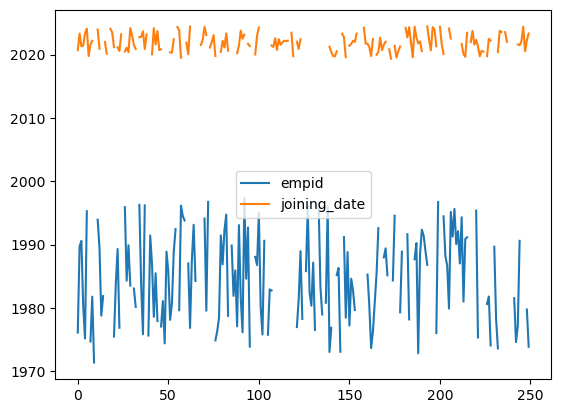

In [28]:
df.plot()